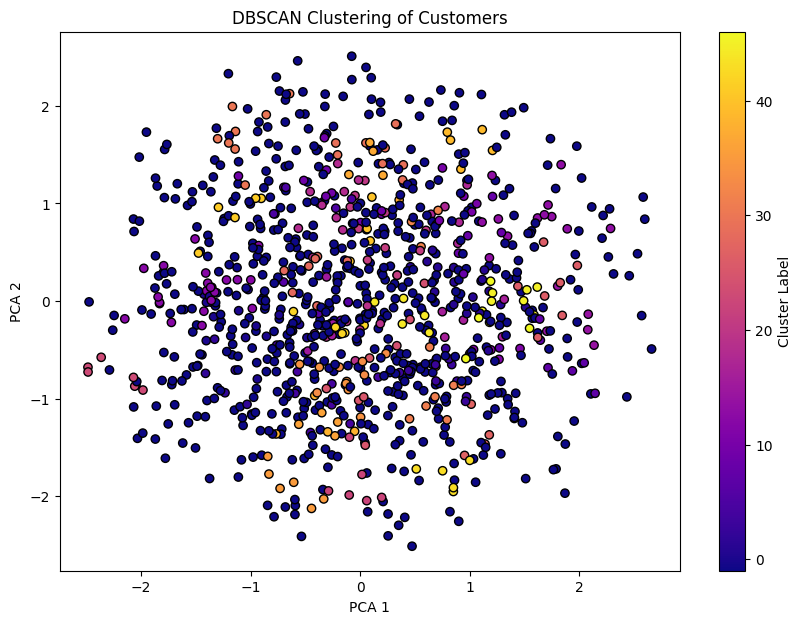

Number of clusters: 47
Cluster Summary:
Cluster
-1     680
 12     22
 1      18
 0      16
 3      13
 13     12
 9      10
 31      9
 18      9
 30      8
 28      8
 29      8
 4       8
 23      7
 45      7
 7       7
 26      7
 15      6
 19      6
 22      6
 35      6
 34      6
 44      5
 25      5
 10      5
 33      5
 27      5
 43      5
 21      5
 46      5
 8       5
 2       5
 41      5
 14      5
 16      5
 5       5
 17      5
 42      5
 39      5
 20      5
 37      5
 36      4
 11      4
 40      4
 6       4
 38      4
 24      3
 32      3
Name: count, dtype: int64
Silhouette Score: -0.312


In [ ]:
# Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Step 2: Load the Dataset
# Load your dataset here; for example, create a sample dataset
# You can replace this with your actual dataset
data = pd.DataFrame({
    'CustomerID': np.arange(1, 1001),
    'TotalPurchases': np.random.randint(1, 100, 1000),
    'AvgPurchaseValue': np.random.uniform(10, 500, 1000),
    'PurchaseFrequency': np.random.randint(1, 20, 1000),
    'LastPurchaseTime': np.random.randint(1, 365, 1000)
})

# Step 3: Preprocess the Data
# Dropping unnecessary columns
data = data.drop(['CustomerID'], axis=1)

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 4: Apply DBSCAN Algorithm
# Choose appropriate values for eps and min_samples
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(data_scaled)

# Add labels to the original data
data['Cluster'] = labels

# Step 5: Visualize the Clusters
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='plasma', marker='o', edgecolor='k')
plt.title('DBSCAN Clustering of Customers')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Step 6: Evaluate the Results
# Number of clusters (excluding noise)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Count of customers in each cluster
cluster_summary = data['Cluster'].value_counts()

print(f'Number of clusters: {num_clusters}')
print('Cluster Summary:')
print(cluster_summary)

# Step 7: Silhouette Score for Evaluation
from sklearn.metrics import silhouette_score

if num_clusters > 1:  # Silhouette score can only be calculated if there is more than one cluster
    silhouette_avg = silhouette_score(data_scaled, labels)
    print(f'Silhouette Score: {silhouette_avg:.3f}')
else:
    print('Silhouette Score cannot be calculated with less than two clusters.')

# Step 8: Recommendations
# Analyze clusters and outliers to develop business strategies
